In [1]:
# Verification:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Gradient Descent Autograd
Linear Regression example:

$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [2]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


In [3]:
def forward(x):
    return w*x

#MSE
def loss(y_pred,y):
    return ((y_pred -y)**2).mean()

X_test = 5.0
pred_X_test = forward(X_test).item()
pred_X_test


0.0

In [4]:
learning_rate = 0.01
n_epochs = 100
for epoch in range(n_epochs):
    y_pred = forward(X)
    l = loss(Y,y_pred)
    l.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        #print(w)

    w.grad.zero_()
    if (epoch+1)%1 ==10:
        print(epoch+1)
    


X_test = 5.0
pred_X_test = forward(X_test).item()
pred_X_test

10.0

## 3. Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [5]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x 
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')
X_test = torch.tensor([5], dtype=torch.float32)
print(X_test)

n_samples = 8, n_features = 1
tensor([5.])


In [6]:

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        return self.lin(x)

input_size, output_size = n_features, n_features
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.600


In [7]:
learning_rate = 0.01
n_epochs = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    y_pred = model(X)
    l = loss(Y,y_pred)
    l.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

epoch  10 : w =  1.6932134628295898  loss =  55.24566650390625
epoch  20 : w =  3.6784322261810303  loss =  11.54340934753418
epoch  30 : w =  3.662977933883667  loss =  105.24171447753906
epoch  40 : w =  1.7786023616790771  loss =  27.278995513916016
epoch  50 : w =  0.3046160936355591  loss =  35.18098831176758
epoch  60 : w =  0.9842112064361572  loss =  103.13436889648438
epoch  70 : w =  2.9867544174194336  loss =  6.77785587310791
epoch  80 : w =  3.88897705078125  loss =  63.53230667114258
epoch  90 : w =  2.5285279750823975  loss =  86.20214080810547
epoch  100 : w =  0.3989019989967346  loss =  0.40363404154777527
Prediction before training: f(5.0) = 3.076


## 4. First Neural Net
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation


In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [9]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [10]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:01<00:00, 8200811.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28489109.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4892067.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3154583.34it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor(2)


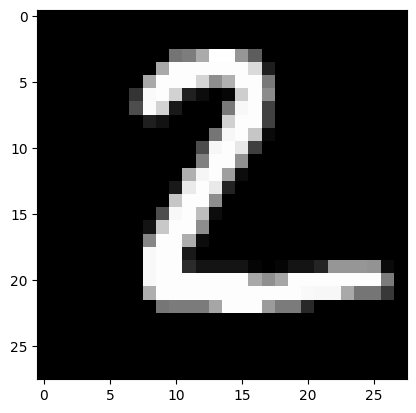

In [11]:
examples = iter(test_loader)
example_data, example_targets = next(examples)
print(example_targets[1])
plt.imshow(example_data[1][0], cmap='gray')


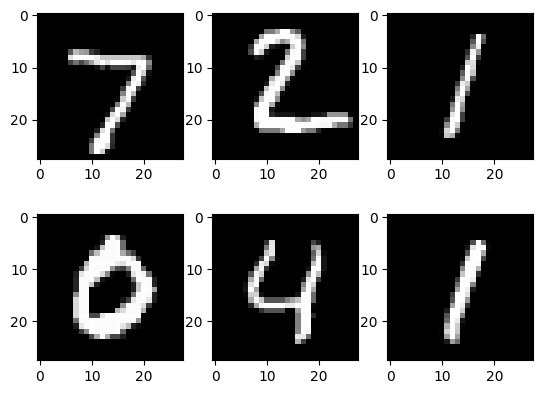

In [12]:
examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [13]:
class NeuralNet(nn.Module):

    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)
model


NeuralNet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [14]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [15]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.2439
Epoch [1/2], Step [200/600], Loss: 0.3671
Epoch [1/2], Step [300/600], Loss: 0.1450
Epoch [1/2], Step [400/600], Loss: 0.1224
Epoch [1/2], Step [500/600], Loss: 0.1033
Epoch [1/2], Step [600/600], Loss: 0.1088
Epoch [2/2], Step [100/600], Loss: 0.1480
Epoch [2/2], Step [200/600], Loss: 0.1133
Epoch [2/2], Step [300/600], Loss: 0.0961
Epoch [2/2], Step [400/600], Loss: 0.0591
Epoch [2/2], Step [500/600], Loss: 0.1254
Epoch [2/2], Step [600/600], Loss: 0.0523


In [16]:
# Test the model: we don't need to compute gradients
i = 0
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()
        i+=1
        #plt.imshow(images[0], cmap='gray')
        if i>1000:
            break
    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {i} test images: {100*acc} %')

Accuracy of the network on the 100 test images: 97.18 %


In [17]:
###